# Elevation profile with Mohajerani GLs

Elevation and GL positions along a profile line were created in QGIS following the steps below. 

Extract elevation profile over a transect.
* Data could be dataframe of distance along profle line and elevation.

1. In QGIS, created line shapefile to extract profiles: `ameryLake_widerSettiingCrossSection_profile.shp`
2. Used Profile Tool to create elevation profile at high resolution using DEM `WV02_20180228_10300100799B9C00_103001007A210C00_2m_lsf_seg1_dem.tif`
3. Created temporary layer (makes points with the elevation profile).
4. Copied first point (distance 0) into new point shapefile layer: `ameryLake_widerSettiingCrossSection_profile_startPoint.shp`
5. Used Distance Matrix tool to calculate distances from first point. This creates a point shapefile layer with both elevation and distance along profile fields. Saved this temporary file to: `ameryLake_widerSettiingCrossSection_profile_ElevationDistance.shp`

Plot as vertical lines where the Mohajerani GLs transect the line
* Data could be a dataframe consistng of distance (along profile line) and date of GL.

1. Used QGIS Line Intersections tool to intersect `AllTracks_6d_GL_meanDates_LDT.shp` with the profile line listed in #1 above. This creates a temporary point shapefile where the lines intersect and retains the GL shapefile attributes.
2. Used Distance Matrix tool to calculate distances from first profile line point from #4 above. Produces a point shapefile layer with two fields: mean GL date (from #1 in this list) and the distance along the profile (from the start point, 0). Saved as `ameryLake_widerSettiingCrossSection_profile_MohajeraniDatesDistance.shp`.




In [1]:
# imports

# for data downloading / reading / analysis
import numpy as np
import xarray as xr
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# set some universal plot settings here
plt.rcParams["figure.dpi"] = 300
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1)
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays

In [2]:
# read data
elev_df = gpd.read_file('data/ameryLake_widerSettiingCrossSection_profile_ElevationDistance.shp')
gl_df = gpd.read_file('data/ameryLake_widerSettiingCrossSection_profile_MohajeraniDatesDistance.shp')

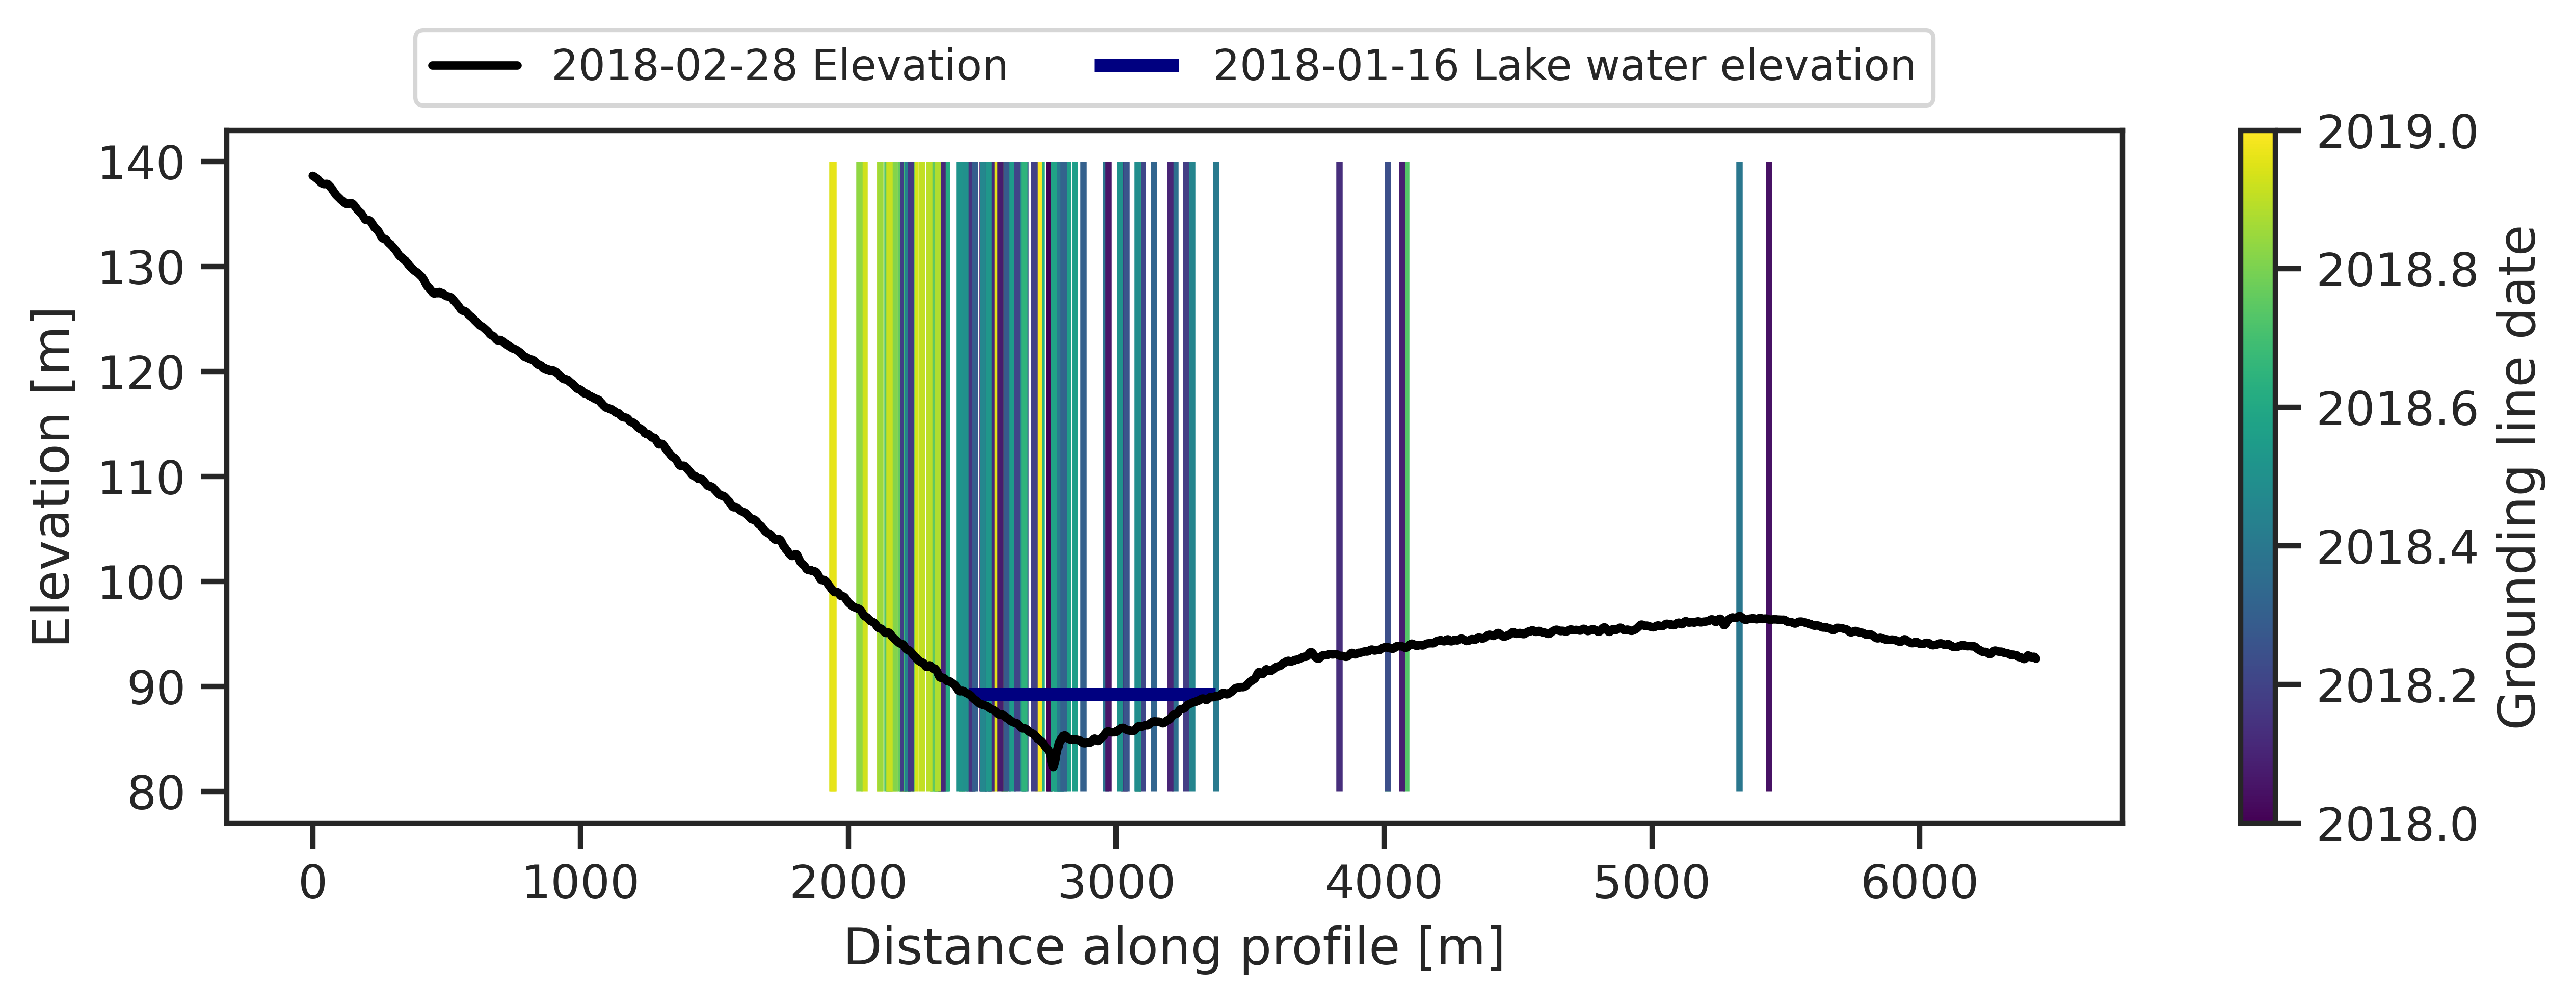

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
fig, ax = plt.subplots(figsize=(10,3))

# plot elevation
elev, = ax.plot(elev_df['Distance'], elev_df['InputID'], label='2018-02-28 Elevation', color='black', linewidth=2)

# plot gls

# make colormap for vlines
gl_dates = gl_df['InputID'].values
dz = gl_dates
norm = plt.Normalize()
lower = dz.min()
upper = dz.max()
colors = plt.cm.viridis((dz-lower)/(upper-lower))

gls = ax.vlines(gl_df['Distance'], 80, 140, label='GL position', color=colors, cmap='viridis')

# plot lake elevation (from median shoreline elevation on 20180116)
lelev = ax.hlines(89.25, 2450, 3370, color='navy', linewidth=3, label='2018-01-16 Lake water elevation')


# make another plot for grounding lines, so that we can properly add a colorbar
# s=0 turns the ponts off, but we can still reference it to make a colorbar for the vlines
ax2 = ax.twinx()
gls_circles = ax2.scatter(gl_df['Distance'],np.linspace(1,1,len(gl_dates)), c=gl_dates, cmap='viridis',
                      vmin=2018, vmax=2019, s=0)

ax2.axis('off')

# labels
ax.set(xlabel='Distance along profile [m]', ylabel='Elevation [m]')
ax2.set(ylabel='Elevation [m]')

# color bar
plt.colorbar(gls_circles, label='Grounding line date')

# add legend
lines = [elev, lelev]
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, bbox_to_anchor=(0.5, 1.175), loc='upper center', ncol = 2, fontsize=10)
# plt.tight_layout()

plt.show()

fig.savefig('FigS3_Profiles.eps', format='eps')

